# Java Quizz!

#### _Subject_: Lists and Streams

> _Note:_ This is a duplicate of a notebook from another module, but with Graphics! ... make sure it is in sync.

First, set the classpath with the right jar. This `jar` contains the statistical functions, system resolution and other linear algebra features, as well as the graphic library we use to display the curves.

This jar is built from the root of this repository, using the following command:
```
$ ./gradlew shadowJar --parallel
```

We add the required jar to the classpath:

In [1]:
%classpath add jar "../build/libs/Algebra-1.0-all.jar"

In [2]:
import java.text.NumberFormat;
import java.util.stream.Collectors;
import java.util.stream.DoubleStream;

import gsg.SwingUtils.WhiteBoardPanel;
import gsg.VectorUtils;
import java.awt.*;
import java.util.ArrayList;
import java.util.List;

We will create a cloud of points in a 2D space.  
Below is the bean describing a Point.

In [3]:
String TITLE = "Lists & Streams";

In [4]:
public static class Point {
  double x;
  double y;

  public Point() {}
  public Point(double x, double y) {
     this.x = x;
     this.y = y;
  }

  public Point x(double x) {
     this.x = x;
     return this;
  }
  public Point y(double y) {
     this.y = y;
     return this;
  }

  public double getX() {
     return this.x;
  }
  public double getY() {
     return this.y;
  }
    
  @Override
  public String toString() {
     return String.format("x:%f, y:%f", this.x, this.y);
  }  
}

We define the dimensions of the plan the points will live in, and the number of points to deal with.

In [5]:
private final static int WIDTH = 100;
private final static int HEIGHT = 100;
private final static int CARDINALITY = 10_000;

## First, we populate a List of Points with random values
`x` &isin; `[-50, 50]`  
`y` &isin; `[-50, 50]`

In [17]:
List<Point> pointList = new ArrayList<>();

double xAttraction = 0.25d;  // [-1, +1]
double yAttraction = -0.1d;  // [-1, +1]

while (pointList.size() < CARDINALITY) {
    
    double xRnd = Math.random();
    double yRnd = Math.random();
   
//     xRnd = (xRnd + xAttraction) / (1 + xAttraction);
//     yRnd = (yRnd + yAttraction) / (1 + yAttraction);
    
    double x = (WIDTH * xRnd)  - (WIDTH / 2);
    double y = (HEIGHT * yRnd) - (HEIGHT / 2);    
   
    // (0.5 + 0.2) / (1 + 0.2)
    
    pointList.add(new Point(x, y));
}

Now, we instantiate the class for graphical display.

In [18]:
WhiteBoardPanel whiteBoard = new WhiteBoardPanel();
whiteBoard.setAxisColor(new Color(125, 0, 255, 255));
whiteBoard.setWithGrid(false);
whiteBoard.setBgColor(new Color(250, 250, 250, 255));
whiteBoard.setGraphicTitle("Original Data");
whiteBoard.setSize(new Dimension(800, 600));
whiteBoard.setTextColor(Color.RED);
whiteBoard.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoard.setGraphicMargins(30);

Prepare data for display:

In [19]:
// Prepare data for display
double[] xData = pointList.stream()
        .mapToDouble(Point::getX)
        .toArray();
double[] yData = pointList.stream()
        .mapToDouble(Point::getY)
        .toArray();
List<VectorUtils.Vector2D> dataVectors = new ArrayList<>();
for (int i=0; i<xData.length; i++) {
    dataVectors.add(new VectorUtils.Vector2D(xData[i], yData[i]));
}

whiteBoard.setAxisColor(Color.BLACK);
whiteBoard.resetAllData();

Display raw data

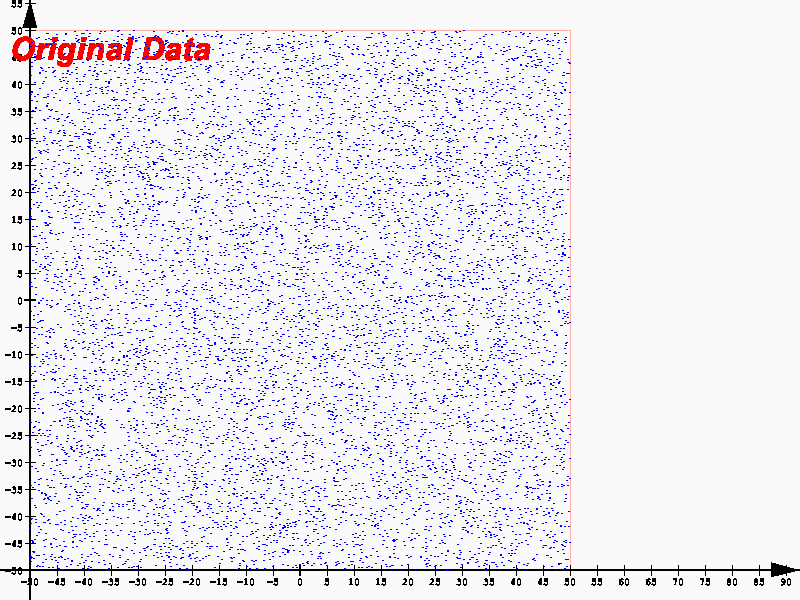

In [20]:
// Raw series
WhiteBoardPanel.DataSerie dataSerie = new WhiteBoardPanel.DataSerie()
        .data(dataVectors)
        .graphicType(WhiteBoardPanel.GraphicType.POINTS)
        .circleDiam(2)
        .color(Color.BLUE);
whiteBoard.addSerie(dataSerie);

// And this is the display
whiteBoard.getImage();

### _Quizz:_ How to get the min and max values, for both X and Y ?

In [21]:
double minX = pointList.stream()
      .min(Comparator.comparing(Point::getX)) // Compare on that method's output (getX). Could be anything.
      .get()
      .getX();
double maxX = pointList.stream()
      .max(Comparator.comparing(Point::getX))
      .get()
      .getX();
double minY = pointList.stream()
      .min(Comparator.comparing(Point::getY))
      .get()
      .getY();
double maxY = pointList.stream()
      .max(Comparator.comparing(Point::getY))
      .get()
      .getY();

System.out.format("On %s points:%n", NumberFormat.getInstance().format(pointList.size()));
System.out.format("MinX: %f, MaxX: %f, MinY: %f, MaxY: %f%n", minX, maxX, minY, maxY);

On 10,000 points:
MinX: -49.999672, MaxX: 49.999696, MinY: -49.954303, MaxY: 49.994069


java.io.PrintStream@20b9d6a2

### _Quizz:_ How would you calculate the position of the _AVERAGE_ point in the cloud?

In [22]:
List<Double> xList = pointList.stream().mapToDouble(Point::getX).boxed().collect(Collectors.toList());
List<Double> yList = pointList.stream().mapToDouble(Point::getY).boxed().collect(Collectors.toList());

double averageX = pointList.stream()
        .mapToDouble(Point::getX)
        .average()
        .getAsDouble();
double averageY = pointList.stream()
        .mapToDouble(Point::getY)
        .average()
        .getAsDouble();

System.out.format("AvgX: %f, AvgY: %f%n", averageX, averageY);

AvgX: 0.089554, AvgY: 0.081550


java.io.PrintStream@20b9d6a2

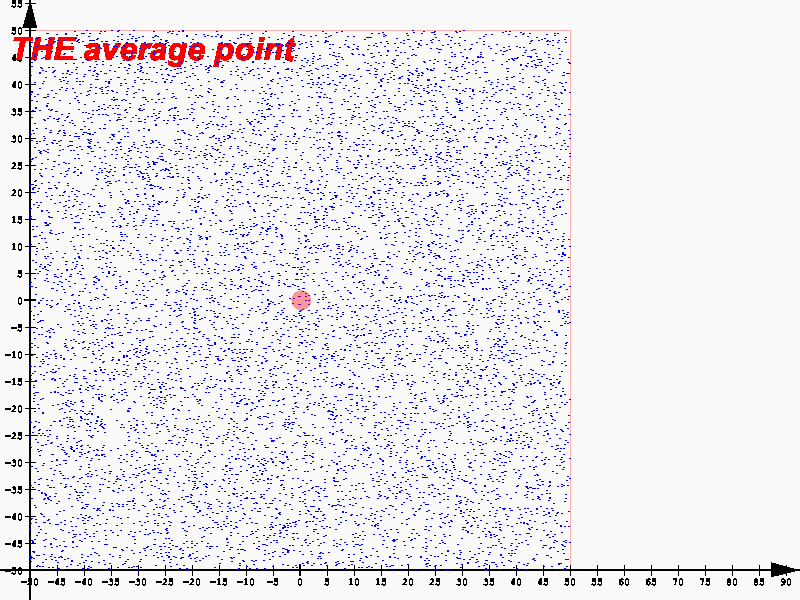

In [23]:
List<VectorUtils.Vector2D> avgDataVectors = new ArrayList<>();
avgDataVectors.add(new VectorUtils.Vector2D(averageX, averageY));

WhiteBoardPanel.DataSerie dataSerie = new WhiteBoardPanel.DataSerie()
        .data(avgDataVectors)
        .graphicType(WhiteBoardPanel.GraphicType.POINTS)
        .circleDiam(20)
        .color(new Color(255, 0, 0, 100));
whiteBoard.addSerie(dataSerie);

whiteBoard.setGraphicTitle("THE average point");

// And this is the display
whiteBoard.getImage();

### _Quizz:_ How would you calculate the Standard Deviation?
See what this Standard Deviation is, in case you forgot : <https://www.mathsisfun.com/data/standard-deviation.html>

In [24]:
private static double stdDev(List<Double> list) {
   double mean = list.stream().mapToDouble(x -> x).average().getAsDouble();
   double variance = list.stream().mapToDouble(x -> Math.pow(x - mean, 2)).sum() / list.size();
   double stdDev = Math.sqrt(variance);
   return stdDev;
}

In [25]:
List<Double> xList = pointList.stream().mapToDouble(Point::getX).boxed().collect(Collectors.toList());
List<Double> yList = pointList.stream().mapToDouble(Point::getY).boxed().collect(Collectors.toList());

double stdDevX = stdDev(xList);
double stdDevY = stdDev(yList);
System.out.format("Std Dev X: %f, Std Dev Y: %f%n", stdDevX, stdDevY);

Std Dev X: 28.749672, Std Dev Y: 28.650262


java.io.PrintStream@20b9d6a2

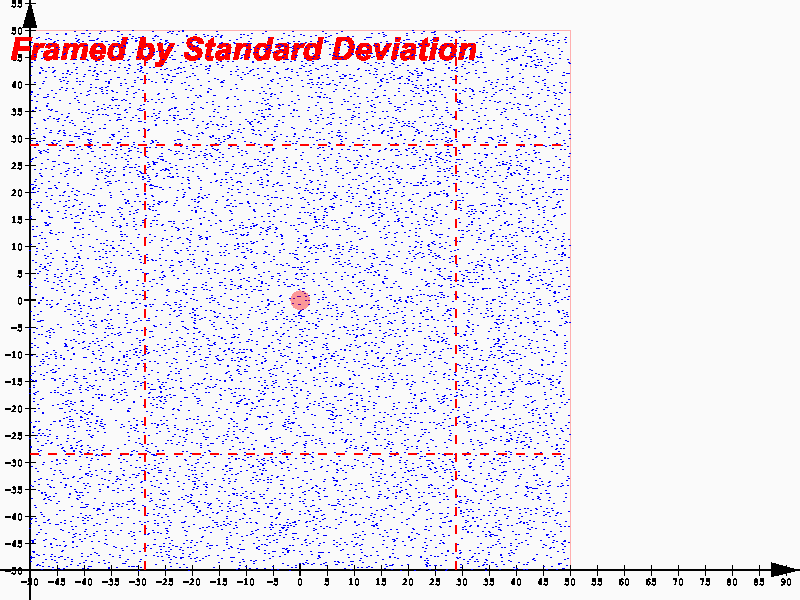

In [26]:
// Add stdDev, minX
List<VectorUtils.Vector2D> minXVectors = new ArrayList<>();
minXVectors.add(new VectorUtils.Vector2D(averageX - stdDevX, - (HEIGHT / 2)));
minXVectors.add(new VectorUtils.Vector2D(averageX - stdDevX, (HEIGHT / 2)));
WhiteBoardPanel.DataSerie minXSerie = new WhiteBoardPanel.DataSerie()
        .data(minXVectors)
        .graphicType(WhiteBoardPanel.GraphicType.DOTTED_LINE)
        .lineThickness(2)
        .color(Color.RED);
whiteBoard.addSerie(minXSerie);

// Add stdDev, maxX
List<VectorUtils.Vector2D> maxXVectors = new ArrayList<>();
maxXVectors.add(new VectorUtils.Vector2D(averageX + stdDevX, - (HEIGHT / 2)));
maxXVectors.add(new VectorUtils.Vector2D(averageX + stdDevX, (HEIGHT / 2)));
WhiteBoardPanel.DataSerie maxXSerie = new WhiteBoardPanel.DataSerie()
        .data(maxXVectors)
        .graphicType(WhiteBoardPanel.GraphicType.DOTTED_LINE)
        .lineThickness(2)
        .color(Color.RED);
whiteBoard.addSerie(maxXSerie);

// Add stdDev, minY
List<VectorUtils.Vector2D> minYVectors = new ArrayList<>();
minYVectors.add(new VectorUtils.Vector2D(- (WIDTH / 2), averageY - stdDevY));
minYVectors.add(new VectorUtils.Vector2D((WIDTH / 2), averageY - stdDevY));
WhiteBoardPanel.DataSerie minYSerie = new WhiteBoardPanel.DataSerie()
        .data(minYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.DOTTED_LINE)
        .lineThickness(2)
        .color(Color.RED);
whiteBoard.addSerie(minYSerie);

// Add stdDev, maxY
List<VectorUtils.Vector2D> maxYVectors = new ArrayList<>();
maxYVectors.add(new VectorUtils.Vector2D(- (WIDTH / 2), averageY + stdDevY));
maxYVectors.add(new VectorUtils.Vector2D((WIDTH / 2), averageY + stdDevY));
WhiteBoardPanel.DataSerie maxYSerie = new WhiteBoardPanel.DataSerie()
        .data(maxYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.DOTTED_LINE)
        .lineThickness(2)
        .color(Color.RED);
whiteBoard.addSerie(maxYSerie);

whiteBoard.setGraphicTitle("Framed by Standard Deviation");

// And this is the display
whiteBoard.getImage();

### _Quizz:_ Sort on X the points where X is positive, and print the first 50 values of X, in _ONE_ line of code.

In [27]:
pointList.stream()
//       .peek(System.out::println)
      .filter(pt -> pt.getX() > 0)
      .mapToDouble(Point::getX)
      .sorted()
      .limit(50)
      .forEach(System.out::println);

7.452905049447622E-4
0.009529054541779658
0.013940527005530612
0.013971915131790524
0.02570387003267882
0.037923053796141915
0.05389086958501821
0.06008512657537324
0.07577201305242198
0.08567689854409366
0.10612784417742915
0.1518876084150449
0.15797246405304577
0.16701245921608887
0.17638599839692404
0.19209894833844032
0.1938866303012574
0.232162539485806
0.2347832702564574
0.23725979186583146
0.24572044565314144
0.24701391613262302
0.25100045518353653
0.2521253366689038
0.25542077291272847
0.26127746763565796
0.283925302569358
0.284280304293695
0.29060913288984125
0.30269907225088843
0.32564661421429264
0.34909391995240213
0.3776745492744453
0.38193518233777723
0.3829679666421768
0.3911277500066177
0.3959933608174282
0.4025513485765302
0.40517428901888053
0.4119801482576051
0.4259464271836464
0.43696485145756725
0.439346031700957
0.46201519346242037
0.4657107566120047
0.47435523714943884
0.4863070308454809
0.5191131431964706
0.5207541078256028
0.5520019614542306


In the code above, what is the role of the `peek` statement, and what does it do?

Done with Lists & Streams!